# Fully Connected Neuronal Networks

Las redes totalmente conectadas, también conocidas como redes completas o grafos completos, son un tipo de red o grafo en el que cada nodo está conectado directamente a todos los demás nodos. En términos más técnicos:

- En una red de computadores: Cada dispositivo (nodo) tiene una conexión directa con todos los otros dispositivos en la red. Esto significa que para n nodos, cada nodo tiene n−1 conexiones directas.

- En teoría de grafos: Un grafo completo es un grafo en el que cada par de vértices distintos está conectado por una arista única.


### Que es un grafo?

Un grafo es una estructura matemática que consiste en un conjunto de vértices (o nodos) y un conjunto de aristas (o enlaces).

- Vértices (nodos): Representan los objetos o entidades.
- Aristas (enlaces): Representan las relaciones o conexiones entre los objetos.

### Perceptrón / Nodo

El perceptrón consituye el fundamento básico de la red neuronal que forma parte del Deep Learning.

En una red neuronal completamente conectada, también llamada red neuronal multicapa, los perceptrones se organizan en capas, donde cada perceptrón de una capa está conectado a todos los perceptrones de la capa siguiente. Cada perceptrón en una capa oculta o en la capa de salida realiza una suma ponderada de las entradas, seguida de la aplicación de una función de activación no lineal. Estas funciones de activación no lineales permiten que la red neuronal aprenda y represente relaciones y patrones complejos en los datos.

### Componentes de FCN

- Neuronas/Perceptrones/Nodos: Son las unidades básicas de procesamiento en la red. Cada neurona en una capa (excepto la de entrada) toma las salidas de todas las neuronas de la capa anterior, realiza una suma ponderada de estas entradas, y aplica una función de activación para producir una salida.

- Capas(Layers): Las neuronas se organizan en capas. En una FCN típica, `hay al menos tres capas: la capa de entrada, una o más capas ocultas y la capa de salida`. La capa de entrada recibe las características o datos de entrada, las capas ocultas realizan transformaciones y extracciones de características, y la capa de salida produce la salida final de la red.

- Pesos: Cada conexión entre neuronas tiene un peso asociado. Estos pesos determinan la influencia relativa de una neurona en la siguiente. Durante el entrenamiento, estos pesos se ajustan para minimizar una función de pérdida y mejorar el rendimiento de la red.

- Funciones de activación: Son funciones no lineales aplicadas a la suma ponderada de las entradas a una neurona. Estas funciones introducen no linealidades en la red, lo que permite a la red aprender y modelar relaciones complejas en los datos. Ejemplos de funciones de activación incluyen la función sigmoide, ReLU (Rectified Linear Unit), tangente hiperbólica, entre otras.

- Función de pérdida: Es una medida que indica qué tan bien está haciendo la red en sus predicciones en comparación con los valores reales. Durante el entrenamiento, la red ajusta sus pesos para minimizar esta función de pérdida (MSE, Categorical Cross-Entropy, Binary-Cross-Entropy, MAE, etc.).

- Algoritmo de optimización: Es el método utilizado para ajustar los pesos de la red durante el entrenamiento para minimizar la función de pérdida. Ejemplos de algoritmos de optimización incluyen el descenso de gradiente estocástico (SGD), Adam, RMSProp, entre otros


### Librerias para trabajar con FCN

- TensorFlow (Google)
- Keras (Google)
- PyTorch (Facebook)
- Scikit-learn


FCN con Keras

In [153]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from PIL import Image
import matplotlib.pyplot as plt

In [162]:
X_train = np.load("D:/Tripleten/datasets/fashion_mnist/train_features.npy")
y_train = np.load("D:/Tripleten/datasets/fashion_mnist/train_target.npy")

X_test = np.load("D:/Tripleten/datasets/fashion_mnist/test_features.npy")
y_test = np.load("D:/Tripleten/datasets/fashion_mnist/test_target.npy")


In [155]:
X_train.shape

(60000, 28, 28)

De esta manera podemos previsualizar la primera imagen

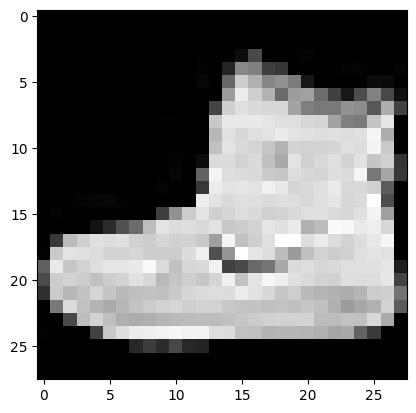

In [165]:
image= Image.fromarray(X_train[0])
# image.show()
plt.imshow(image, cmap='gray')

Para poderla entrenar necesitamos una estructura plana y luego dividimos entre 255 para que el modelo trabaje mejor con los elementos (ya que serían transformados entre valores de 0 a 1)

In [157]:
X_train= X_train.reshape(-1, X_train.shape[1]* X_train.shape[2])/255 #Filas, columnas
X_test= X_test.reshape(-1, X_test.shape[1]* X_test.shape[2])/255 #Filas, columnas

print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


Con esto volvimos esas imagenes 28x28 en imagenes en una linea de pixeles planos de 1x784 para cada una de las 60,000 imagenes

In [158]:
pd.DataFrame(X_train).head(4)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Procedemos a crear nuestro modelo

In [159]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=64, activation='relu')) #input_shape=(X_train.shape[1],)
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

'''Esta función añade una capa densa (totalmente conectada) al modelo.
 Una capa densa es una capa en la que cada neurona está conectada a 
 todas las neuronas de la capa anterior'''

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)


Una vez configurado ahora entrenamos nuestro modelo

In [160]:
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=2,
)

Epoch 1/10
1875/1875 - 5s - 3ms/step - acc: 0.8171 - loss: 0.5209 - val_acc: 0.8468 - val_loss: 0.4327
Epoch 2/10
1875/1875 - 3s - 2ms/step - acc: 0.8622 - loss: 0.3843 - val_acc: 0.8538 - val_loss: 0.3994
Epoch 3/10
1875/1875 - 3s - 1ms/step - acc: 0.8723 - loss: 0.3492 - val_acc: 0.8341 - val_loss: 0.4453
Epoch 4/10
1875/1875 - 3s - 1ms/step - acc: 0.8801 - loss: 0.3277 - val_acc: 0.8639 - val_loss: 0.3733
Epoch 5/10
1875/1875 - 3s - 1ms/step - acc: 0.8856 - loss: 0.3114 - val_acc: 0.8629 - val_loss: 0.3683
Epoch 6/10
1875/1875 - 3s - 2ms/step - acc: 0.8906 - loss: 0.2985 - val_acc: 0.8729 - val_loss: 0.3547
Epoch 7/10
1875/1875 - 3s - 2ms/step - acc: 0.8953 - loss: 0.2847 - val_acc: 0.8708 - val_loss: 0.3614
Epoch 8/10
1875/1875 - 3s - 2ms/step - acc: 0.8971 - loss: 0.2786 - val_acc: 0.8793 - val_loss: 0.3463
Epoch 9/10
1875/1875 - 3s - 2ms/step - acc: 0.9000 - loss: 0.2676 - val_acc: 0.8725 - val_loss: 0.3514
Epoch 10/10
1875/1875 - 3s - 2ms/step - acc: 0.9015 - loss: 0.2610 - val_